In [1]:
import math;
import cmath;
import sys;
import numpy as np;
import time;
from copy import deepcopy;
import matplotlib.pyplot as plt


In [2]:
def make_R01(kmax, shift = 0):
    n_0 = np.mod(time.time() + shift,4096)
    m1 = 4096
    m2 = 150889
    m3 = 714025
    nk = np.zeros((kmax))
    xk = np.zeros((kmax))
    nk[0] = n_0
    xk[0] = nk[0]/m3
    for i in range(1,kmax):
        nk[i] = np.mod(m1*nk[i-1] + m2, m3)
        xk[i] = nk[i]/m3
    return xk

def make_R(a, b, kmax, shift = 0):
    return (b-a)*make_R01(kmax, shift) + a

def make_N01(kmax):
    a1 = make_R(0,1,kmax)
    a2 = make_R(0,714025,kmax, 100)
    for i in range(0, kmax):
        a2[i] = (a2[i] + 1)/(714026)
    n1 = np.zeros((kmax))
    n2 = np.zeros((kmax))
    for i in range(0,kmax):
        n1 = np.sin(2*np.pi*a1)*np.sqrt(-2*np.log(a2))
        n2 = np.cos(2*np.pi*a1)*np.sqrt(-2*np.log(a2))
    return n1, n2

def make_N(m, d, kmax):
    return make_N01(kmax)[0]*d + m



def white_noise(tmax,h,m = 0, d = 1):
    tmin = 0
    return make_N(m, d, int((tmax - tmin)/h))
def F(w):
    return (2*w*w + 3)

def H(w):
    return ((4 + m*m)*(0.25 + m*m))

def Ф(p):
    h = 0.01
    S0 = h/(2*np.pi)
    return (1/np.sqrt(S0))*F(p)/H(p)

def f1(t,x,y1,y2,y3,y4):
    return y2
def f2(t,x,y1,y2,y3,y4):
    return (y3 + np.sqrt(2*np.pi/h)*x[t])
def f3(t,x,y1,y2,y3,y4):
    return y4
def f4(t,x,y1,y2,y3,y4):
    return -y1-(4.25/1)*y3+(2/3)*np.sqrt(2*np.pi/h)*x[t]

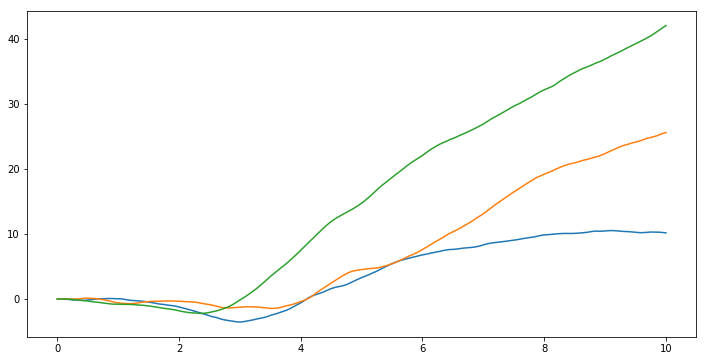

In [4]:
h = 0.005
S0 = h/(2*np.pi)
plt.figure(figsize=(12,6))
for _ in range(3):
    tmax = 10
    tmin = 0
    h = 0.05
    yij = np.zeros((4,int(10/0.05)))


    tmax = 10
    tmin = 0
    h = 0.05
    yij = np.zeros((4,int(10/0.05)))


    for i in range(0,4):
        yij[i][0] = 0

    for j in range(1,int(tmax/h)):
        x_ = white_noise(tmax,h,m = 0, d = 1)
        yij[0][j] = yij[0][j-1] + h*f1(j,x_,yij[0][j-1],yij[1][j-1],yij[2][j-1],yij[3][j-1])
        yij[1][j] = yij[1][j-1] + h*f2(j,x_,yij[0][j-1],yij[1][j-1],yij[2][j-1],yij[3][j-1])
        yij[2][j] = yij[2][j-1] + h*f3(j,x_,yij[0][j-1],yij[1][j-1],yij[2][j-1],yij[3][j-1])
        yij[2][j] = yij[3][j-1] + h*f4(j,x_,yij[0][j-1],yij[1][j-1],yij[2][j-1],yij[3][j-1])


    t = np.linspace(tmin, tmax, int(tmax/h))

    plt.plot(t, yij[0])
# plt.plot(t, yij[1])
# plt.plot(t, yij[2])